# Messung der Strom-Spannung Kennlinie eines Photowiderstandes

Zuerst die imports, numpy weil man das immer braucht. Pandas ist <b>die</b> Library für Datenanalyse heutzutage. Pyplot zum plotten und den curve_fit für eine Regression.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Einfach die csv einlesen. Pandas lädt die Dateien in so genannte <b>Dataframes</b> (kurz df) ein. Man kann sich diese mehr oder weniger als Excel Tabellen vorstellen. Mit df.head(n) kann man die ersten n Einträge anzeigen lassen.

In [11]:
data = pd.read_csv("../Daten/Aufgabe1_549nm.csv")

In [12]:
data.head(3)

,U in V,I in A
0,0.00001,0.00000
1,0.90386,1.06064
2,1.80804,2.11372


Mit df.plot kann man sich die entsprechenden Spalten plotten lassen. Gut um kurz eine Übersicht zu bekommen, aber zum plotten für die Graphen im Protokoll wird fast immer plt verwendet bei uns.

<AxesSubplot:xlabel='U in V'>

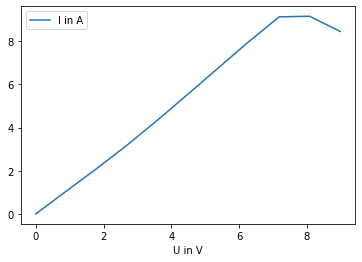

In [13]:
data.plot('U in V', 'I in A')

Jetzt zur Physik. Ein Photowiderstand ist in guter Näherung ein Ohm'scher Widerstand. Das heißt, dass die Kennlinie eine Gerade sein sollte. Dies ist aber hier nicht der Fall. Das liegt daran, dass das Messgerät nur bis $10$ A messen konnte und dann angefangen hat komische Sachen zu machen.<br><br>

Deswegen wird nur bis ca. $7$ V als linear angenommen und zur Auswertung genutzt.<br>
Zuerst die lineare Funktion zur Regression definieren.

In [6]:
def function(x, m, b):
    return m*x + b

SciPy.curve_fit funktioniert nur mit Arrays. Dataframes sind jedoch ein eigener Datentyp. Daher werden diese auf Arrays umgecastet. Zugriff auf die einzelnen Einträge funktioniert mit dem df.iloc Befehl. Dieser erlaubt Zugriff auf die Einträge mit einem Index (Zugriff auf die Einträge nach Label/Titel funktioniert mit df.loc). Also wird hier auf alle Einträge der ersten Spalte $[:, 0]$ und der zweiten Spalte $[:, 0]$ Mit .values werden die Werte umgewandelt in Arrays. Das .reshape dient dazu die Arrays in die richtige Form zu bringen. -1 heißt einfach hier, dass automatisch berechnet wird, welche Dimension dieser Eintrag haben wird. Das ist nur wichtig, damit wir keine Arrays der Form $(n, 1)$ haben, die gleich aussehen (wir haben $(n,)$) aber nicht von SciPy.curve_fit angenommen werden.

In [7]:
x = data.iloc[:, 0].values.reshape(-1,)
y = data.iloc[:, 1].values.reshape(-1,)

Hier wird gefittet. Die Parameter sind $popt$ was die optimalen Parameter $m$ und $b$ sind. Die Diagonalelemente von $pcov$ sind die Fehler auf die Regression. Wie vorhin erwähnt, werden die letzten drei Datenpunkte rausgeschmissen, da diese offensichtlich nicht linear sind.

In [8]:
popt, pcov = curve_fit(function, x[:-3], y[:-3])

In [9]:
print(popt)
print(pcov)

[ 1.27207786 -0.12489229]
[[ 0.00028839 -0.00090794]
 [-0.00090794  0.00407643]]


Mit $^*popt$ kann man einfach beide Einträge als Variablen in der Funktion übergeben, wenn diese auch zwei Argumente annimmt an dieser Stelle.

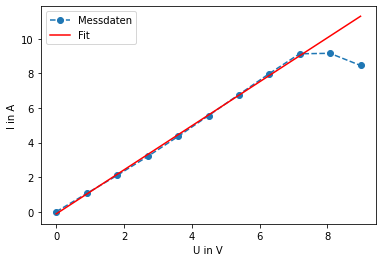

In [10]:
plt.plot(x, y, 'o--', label='Messdaten')
plt.ylabel('I in A')
plt.xlabel('U in V')
plt.plot(x, function(x, *popt), label='Fit', color='red')
plt.legend()

Fehler wird noch berechnet. Größtfehler wird abgeschätzt über ungeauigkeit von der Messung selbst (Feinheit der Skala, genauigkeit der Messgeräte, etc.).

In [64]:
error = popt[0] * 0.01
error

0.012720778629093437